In [5]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_percentage(clf):
    labels = np.arange(0, len(np.unique(clf.labels_)) + 1)
    values, _ = np.histogram(clf.labels_, bins=labels)
    percent = (values/values.sum())*100
    
    return percent

The orignal image is


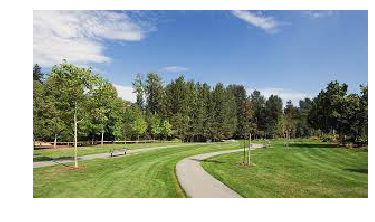

Enter the number of clusters you want for this image: 2
The percentage probability of the colors are: [52.01587302 47.98412698]


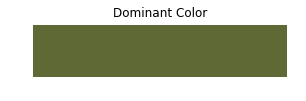

[ 94.4217957  104.5550807   53.83714275]
The HEX code of the color selected is: #5e8728


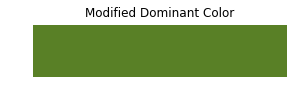

In [6]:
image = cv2.imread('Images/park.jfif')

#Display orignal image
img=mpimg.imread('Images/park.jfif')
print('The orignal image is')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

bgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
k = int(input('Enter the number of clusters you want for this image: '))

img = bgr.reshape((bgr.shape[0] * bgr.shape[1], 3))
clf = KMeans(n_clusters=k)
clf.fit(img)
percentages = find_percentage(clf)
print(f'The percentage probability of the colors are: {percentages}')

maxi = 0
for i,val in enumerate(percentages):
    if val > maxi:
        index = i
        maxi = val

color = clf.cluster_centers_[index]
color /= color.sum() #to show in matplotlib, we need ratios
plt.title('Dominant Color')
plt.bar(1, 2, color=tuple(color))
plt.axis('off')
plt.gcf().set_size_inches(5,1)
plt.show()


clf = KMeans(n_clusters=k)
clf.fit(img)
percentages = find_percentage(clf)

maxi = 0
for i,val in enumerate(percentages):
    if val > maxi:
        index = i
        maxi = val

color = clf.cluster_centers_[index]
print(color)
min_index = np.argmin(color)
max_index = np.argmax(color)
for i, x in np.ndenumerate(color):
    if i == min_index:
        if x < 40:
            color[i] = x - x*0.1
        elif x < 100:
            color[i] = x - x*0.25
        elif x < 220:
            color[i] = x - x*0.7
    elif i == max_index:
        if x < 100: 
            color[i] = x + x*0.7
        elif x < 150:
            color[i] = x + x*0.3
        elif x < 220:
            color[i] = x + x*0.1

x = color.astype(int)
res = tuple(x)
hexcode = '#%02x%02x%02x' % res
print(f'The HEX code of the color selected is: {hexcode}')
color /= color.sum()
plt.title('Modified Dominant Color')
plt.bar(1, 2, color=tuple(color))
plt.axis('off')
plt.gcf().set_size_inches(5,1)
plt.show()